# Inmersión alura

## Clase 2

In [27]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# load dataset
inmuebles = pd.read_csv('../data/inmuebles_bogota_mod.csv')
inmuebles.drop('Unnamed: 0', axis=1, inplace=True)
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   int64  
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 818.2+ KB


In [29]:
# calculo del precio del m2 por barrio
datos_barrio = inmuebles.groupby('Barrio').sum()
datos_barrio

,Tipo,Descripcion,Habitaciones,Banos,Area,UPZ,Valor,Moneda,Precio,Precio_Millon
Barrio,,,,,,,,,,
Alameda,Apartamento,Apartamento en venta en Alameda,3,2,97,Engativá,$ 580.000.000,$,580000000,580.000000
Alhambra,ApartamentoApartamentoCasaCasaCasaApartamentoC...,Apartamento en venta en AlhambraApartamento en...,51,50,3237,La AlhambraLa AlhambraLa AlhambraLa AlhambraLa...,$ 400.000.000$ 780.000.000$ 1.100.000.000$ 1.4...,$$$$$$$$$$$$$$$$$,12790000000,12790.000000
Andes Norte,CasaApartamentoCasaApartamentoApartamentoApart...,Casa en venta en Andes NorteApartamento en ven...,21,20,874,La FlorestaLa FlorestaLa FlorestaLa FlorestaLa...,$ 750.000.000$ 585.000.000$ 750.000.000$ 1.260...,$$$$$$$,4967000000,4967.000000
Antonio Nariño,ApartamentoApartamentoCasaApartamentoApartamen...,Apartamento en venta en Antonio NariñoApartame...,207,120,7827,RestrepoRestrepoRestrepoRestrepoRestrepoRestre...,$ 175.000.000$ 122.000.000$ 850.000.000$ 245.0...,$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$,22042650000,22042.650000
Barrancas,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en BarrancasApartamento e...,43,32,1053,San Cristóbal NorteSan Cristóbal NorteSan Cris...,$ 238.000.000$ 238.000.000$ 238.000.000$ 233.0...,$$$$$$$$$$$$$$$,4712000000,4712.000000
...,...,...,...,...,...,...,...,...,...,...
Villa Maria,CasaCasaCasaCasaCasaApartamentoCasaCasaCasaCas...,Casa en venta en Villa MariaCasa en venta en V...,61,48,2693,El RincónEl RincónEl RincónEl RincónEl RincónE...,$ 240.000.000$ 437.000.000$ 437.000.000$ 437.0...,$$$$$$$$$$$$$,5237000000,5237.000000
Villas De Granada,ApartamentoApartamentoCasaApartamentoApartamen...,Apartamento en venta en Villas De GranadaApart...,76,51,1905,Garcés NavasGarcés NavasGarcés NavasGarcés Nav...,$ 215.625.000$ 230.000.000$ 260.000.000$ 250.0...,$$$$$$$$$$$$$$$$$$$$$$,6210625000,6210.625000
Villemar,ApartamentoApartamentoApartamentoCasaApartamen...,Apartamento en venta en VillemarApartamento en...,53,37,1384,FontibónFontibónFontibónFontibónFontibónFontib...,$ 360.000.000$ 205.000.000$ 245.000.000$ 600.0...,$$$$$$$$$$$$$$$$$$,5469000000,5469.000000


In [30]:
datos_barrio['Valor_m2_Barrio'] = datos_barrio['Precio_Millon']/datos_barrio['Area']
datos_barrio.Valor_m2_Barrio

Barrio
Alameda               5.979381
Alhambra              3.951189
Andes Norte           5.683066
Antonio Nariño        2.816232
Barrancas             4.474834
                        ...   
Villa Maria           1.944671
Villas De Granada     3.260171
Villemar              3.951590
Zona Franca           2.962963
Zona Noroccidental    4.572009
Name: Valor_m2_Barrio, Length: 149, dtype: float64

In [31]:
# agregar valores calculados al dataset principal
m2_barrio = dict(datos_barrio['Valor_m2_Barrio'])
inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio']
inmuebles['Valor_m2_Barrio'] = inmuebles['Valor_m2_Barrio'].map(m2_barrio)
inmuebles.head(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.0,4.572009
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.0,3.403589
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.0,8.104487
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.0,5.655581
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.0,6.290551


In [36]:
top_barrios = inmuebles['Barrio'].value_counts()[:10].index # 10 barrios con más inmuebles
datos_barrio.reset_index(inplace=True)
data_top10_barrios = datos_barrio.query('Barrio in @top_barrios')
data_top10_barrios

,level_0,index,Barrio,Tipo,Descripcion,Habitaciones,Banos,Area,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Barrio
5,5,5,Barrios Unidos,ApartamentoCasaApartamentoApartamentoApartamen...,Apartamento en venta en Barrios UnidosCasa en ...,1525,1196,87799,Los AndesLos AndesLos AndesLos AndesLos AndesL...,$ 445.000.000$ 990.000.000$ 160.000.000$ 460.0...,$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$...,259877762703,259877.762703,2.959917
10,10,10,Bosa,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en BosaApartamento en ven...,1743,789,34879,Bosa CentralBosa CentralBosa CentralBosa Centr...,$ 225.000.000$ 134.000.000$ 117.000.000$ 132.0...,$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$...,93400560494,93400.560494,2.677845
22,22,22,Cedritos,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en CedritosApartamento en...,1458,1348,53711,UsaquénUsaquénUsaquénUsaquénUsaquénUsaquénUsaq...,$ 354.000.000$ 354.000.000$ 458.000.000$ 660.0...,$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$...,270027733421,270027.733421,5.027420
24,24,24,Chapinero,ApartamentoApartamentoApartamentoLocalApartame...,Apartamento en venta en ChapineroApartamento e...,892,913,81248,CHAPINERO: Pardo Rubio + ChapineroCHAPINERO: P...,$ 749.000.000$ 720.000.000$ 650.000.000$ 350.0...,$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$...,372130933118,372130.933118,4.580186
50,50,50,Engativa,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en EngativaApartamento en...,1676,1077,59808,EngativáEngativáEngativáEngativáEngativáEngati...,$ 258.000.000$ 258.000.000$ 331.500.000$ 202.0...,$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$...,172711728232,172711.728232,2.887770
63,63,63,Kennedy,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en KennedyApartamento en ...,2151,1233,61475,Kennedy CentralKennedy CentralKennedy CentralK...,$ 680.000.000$ 185.000.000$ 185.000.000$ 195.0...,$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$...,207963648911,207963.648911,3.382898
125,125,125,Santa Barbara,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en Santa BarbaraApartamen...,1073,1162,54693,USAQUÉN: Country Club + Santa BárbaraUSAQUÉN: ...,$ 565.000.000$ 565.000.000$ 510.000.000$ 425.0...,$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$...,320097803000,320097.803000,5.852628
132,132,132,Suba,ApartamentoApartamentoApartamentoApartamentoCa...,Apartamento en venta en SubaApartamento en ven...,1497,1202,61615,SubaSubaSubaSubaSubaSubaSubaSubaSubaSubaSubaSu...,$ 469.000.000$ 210.000.000$ 270.000.000$ 325.0...,$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$...,266406040022,266406.040022,4.323721
138,138,138,Usaquén,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en UsaquénApartamento en ...,3109,3044,148121,UsaquénUsaquénUsaquénUsaquénUsaquénUsaquénUsaq...,$ 890.000.000$ 420.000.000$ 261.500.000$ 349.0...,$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$...,837710365000,837710.365000,5.655581
148,148,148,Zona Noroccidental,ApartamentoCasaApartamentoCasaCasaCasaCasaCasa...,Apartamento en venta en Zona NoroccidentalCasa...,2778,2204,119084,CHAPINERO: Pardo Rubio + ChapineroCHAPINERO: P...,$ 360.000.000$ 2.519.000.000$ 239.000.000$ 1.6...,$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$...,544453061408,544453.061408,4.572009


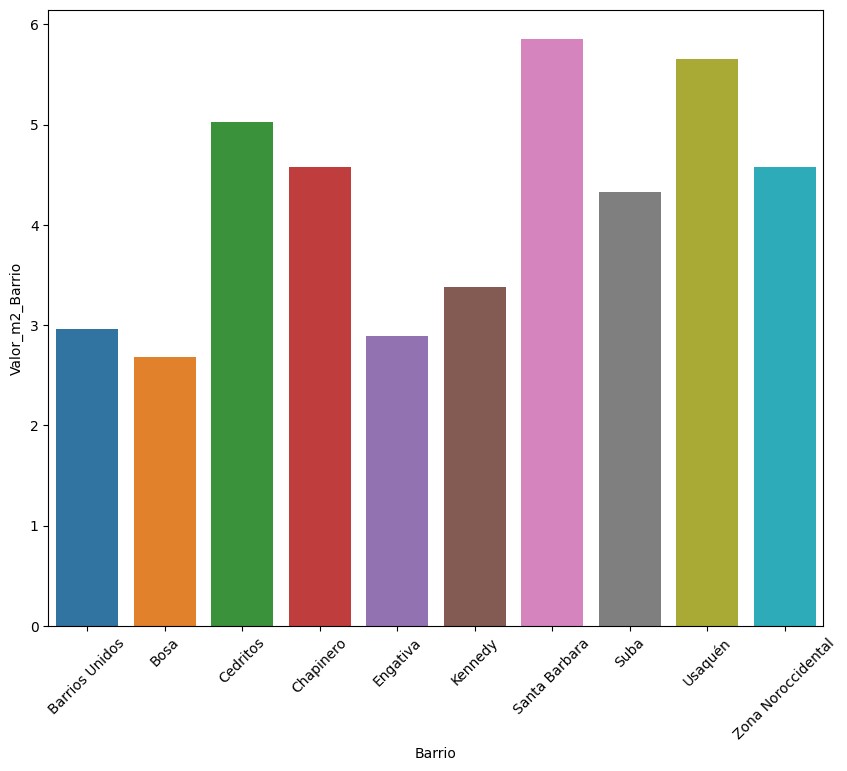

In [40]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x = 'Barrio', y='Valor_m2_Barrio', data=data_top10_barrios)
ax.tick_params(axis='x', rotation=45)
plt.show()

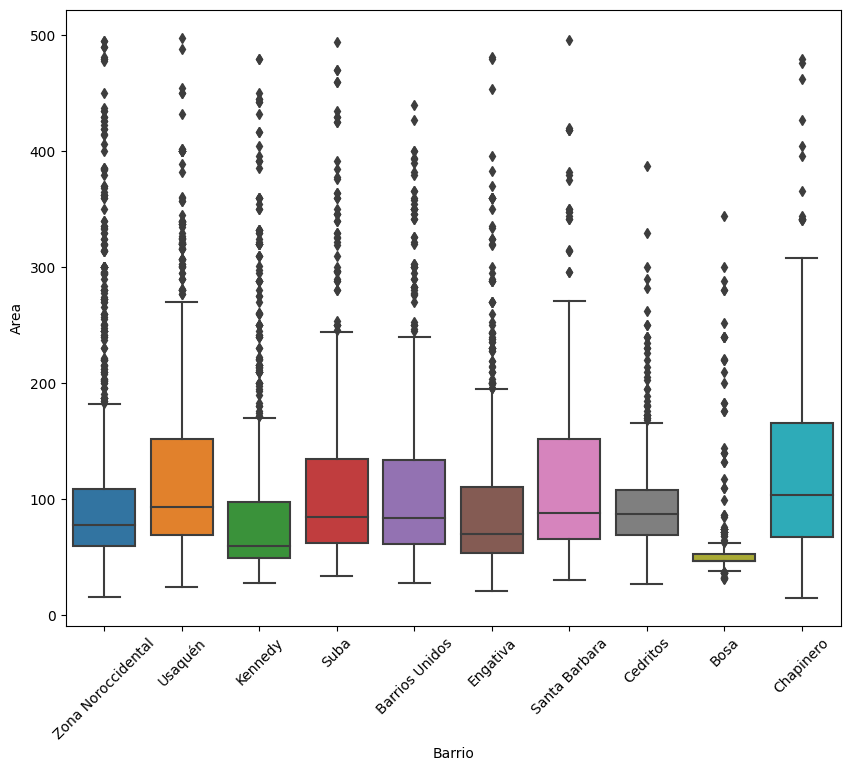

In [47]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x = 'Barrio', y='Area', data=inmuebles.query('Barrio in @top_barrios & Area < 500'))
ax.tick_params(axis='x', rotation=45)
plt.show()

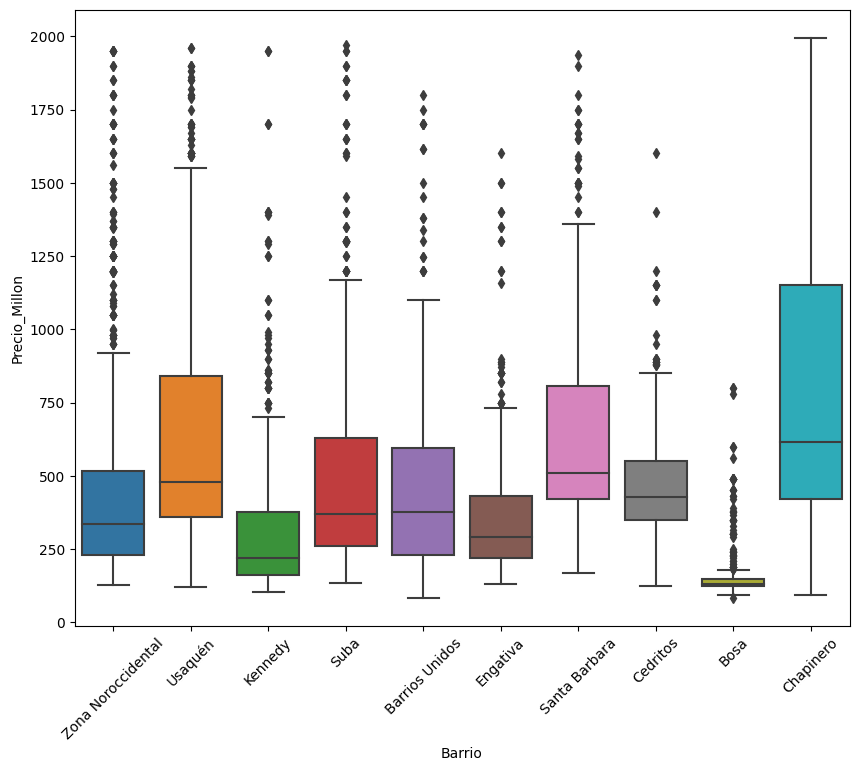

In [48]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x = 'Barrio', y='Precio_Millon', data=inmuebles.query('Barrio in @top_barrios & Precio_Millon < 2000'))
ax.tick_params(axis='x', rotation=45)
plt.show()